*********Rental Bike Assignment*******

In [439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Reading the input data from file

In [441]:

bike = pd.read_csv(r'C:\Users\hari\OneDrive\Desktop\Python\day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [442]:

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [443]:
bike.shape

(730, 16)

In [444]:
#Check if any null values in the data
#bike.info()
bike.isnull().sum().sort_values(ascending=False)

# No Null values 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#Data Cleaning and Manipulation

In [446]:
#making binary for WEEKDAY as 1 or 0
bike['weekday']=bike['weekday'].apply(lambda x:1 if x in [1,2,3,4,5] else 0)

#dropped columns 'casual' and 'registered' as our target variable is 'cnt' and 'instant' column doesnt have any siginificance here. Dropping 'dteday' as we have 
#yr and month columns to analyse the data
bike= bike.drop('casual', axis=1)
bike= bike.drop('registered', axis=1)
bike= bike.drop('instant',axis=1)
bike= bike.drop('dteday',axis=1)

In [447]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [448]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,1,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,1,1,1,9.305237,11.46350,43.6957,12.522300,1600


Checking the corelation between different independent numeric variables

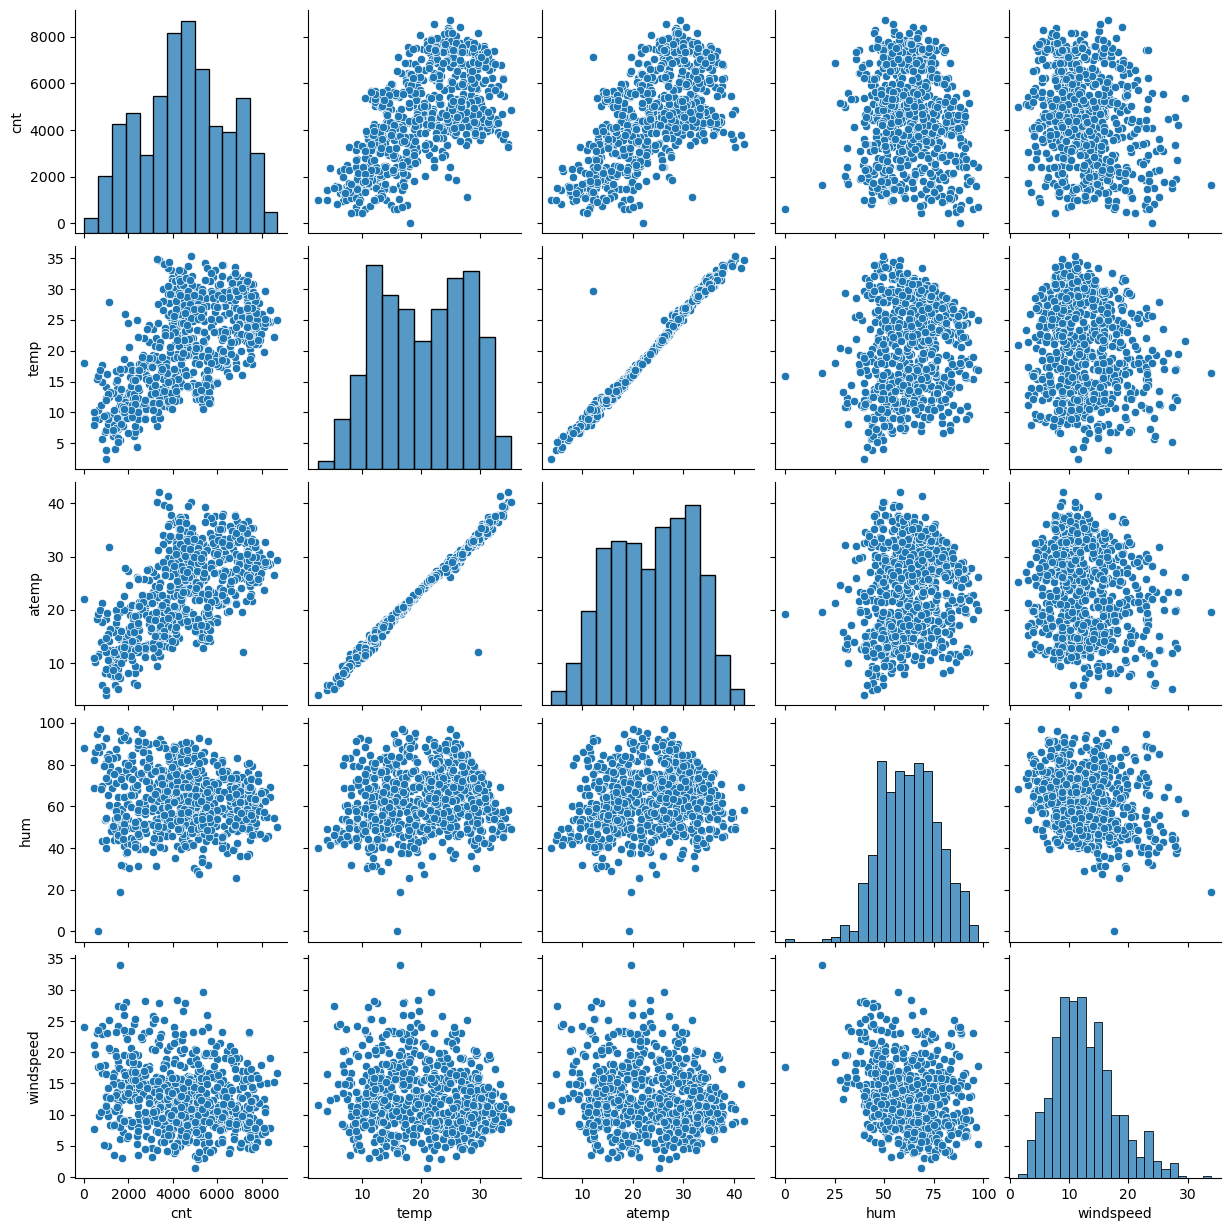

In [450]:
sns.pairplot(data = bike, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

By visualising the numeric variables, we can conclude that a linear model can be considered in this case because there are atleast some independent variables like atemp , temp etc which show a positive correlation with the target variable cnt .

#Drawing the box plots between Target variable and independent variable to find the corelation 

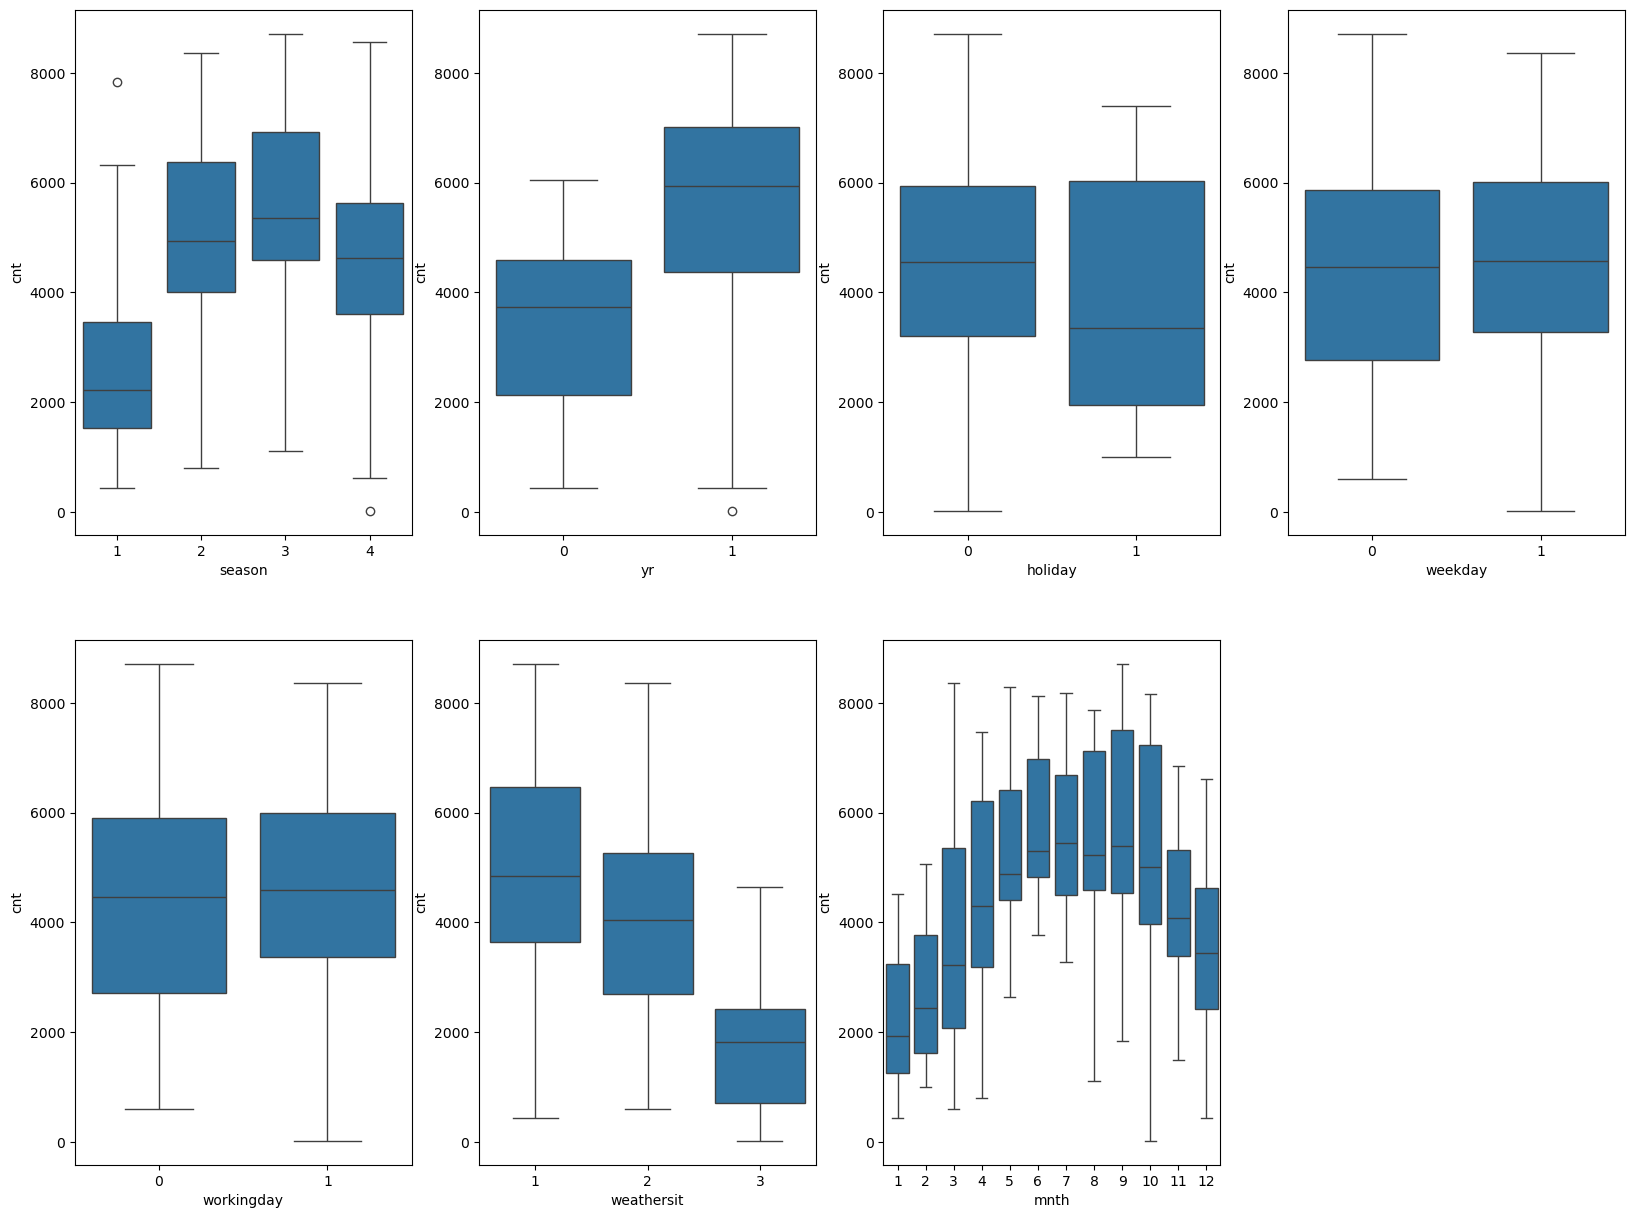

In [453]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.show()

Few insights from above graphs:
From the above grap: D demand was more during Fall season
Demand is more in 2019 than 2018
Bike demand is almost constant through out the week
Demand was between 4k and 5k during clear weather
Demand was more during August and September month
count is less during holidays

In [455]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


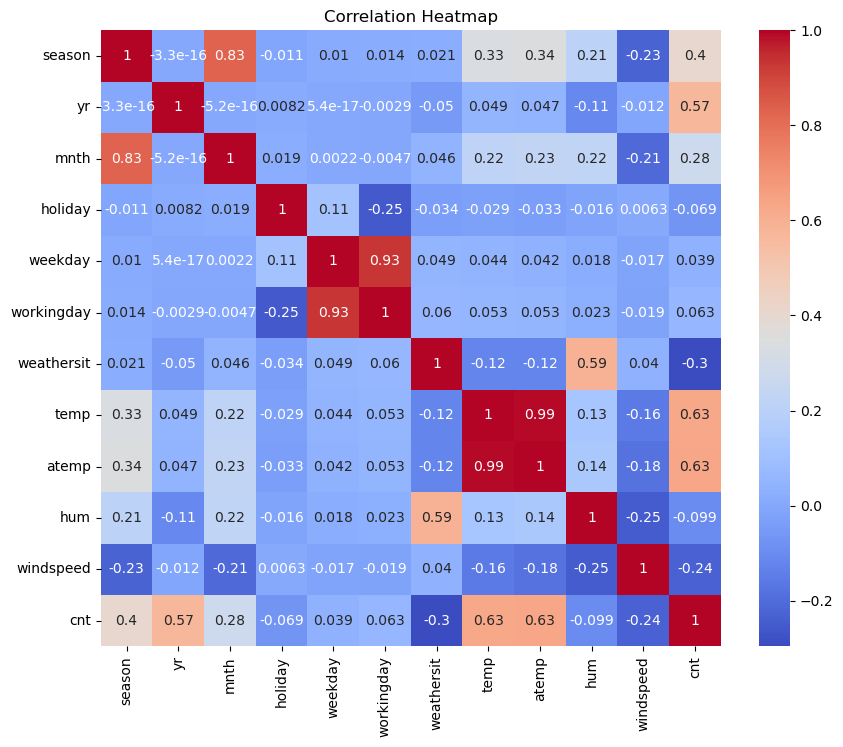

In [456]:
#Multivarient analysis>
correlation_matrix = bike.corr()
# Plot heatmap using the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True , cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
#  count of rental bikes are highly correlated with year 2019 and temperature

In [457]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,1,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,1,1,1,9.305237,11.46350,43.6957,12.522300,1600


Dummy variables

In [459]:
bike.shape

(730, 12)

In [460]:
# Get the dummy variables for the feature 'weathersit' 
dummy1 = pd.get_dummies(bike['weathersit'], drop_first=True ,dtype=int)

# Check what the dataset 'status' looks like
dummy1.head()
dummy1 = dummy1.rename(columns={2: 'Cloudy', 3: 'Rain'}) # renaming with meaningfull strings for columns 2 and 3
dummy1.head()

,Cloudy,Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [461]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status2'
dummy2= pd.get_dummies(bike['season'], drop_first=True, dtype=int)
dummy2 = dummy2.rename(columns={2: 'Summer', 3: 'fall', 4: 'winter'})
dummy2.head()

,Summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [462]:
#concat the dummy df with original one

bike = pd.concat([bike, dummy1], axis=1)
bike = pd.concat([bike, dummy2], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Cloudy,Rain,Summer,fall,winter
0,1,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,1,0,1,0,1,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,1,0,1,0,1,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [463]:
bike= bike.drop(['weathersit', 'season'], axis=1) # dropping redundant variebles
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Cloudy,Rain,Summer,fall,winter
0,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [464]:
bike.shape

(730, 15)

Splitting Train and Test DataSet 

In [466]:
#spliting into train and test

bike_train, bike_test= train_test_split(bike, train_size=0.7, random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 15)
(220, 15)


In [467]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  Cloudy      730 non-null    int32  
 11  Rain        730 non-null    int32  
 12  Summer      730 non-null    int32  
 13  fall        730 non-null    int32  
 14  winter      730 non-null    int32  
dtypes: float64(4), int32(5), int64(6)
memory usage: 71.4 KB


In [468]:
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Cloudy,Rain,Summer,fall,winter
0,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


SCALING the Variables

In [470]:
#Scaling the variables
#Normalization :(x-xmin)/(xmax-xmin)
# Apply scaler() to all the columns except the binary 0/1 and 'dummy' variables

scaler=MinMaxScaler()
#create list of numeric vars
num_vars= ['mnth','temp','atemp','hum','windspeed','cnt']

#fit the data
bike_train[num_vars]= scaler.fit_transform(bike_train[num_vars])
bike_train[num_vars].head()

,mnth,temp,atemp,hum,windspeed,cnt
576,0.545455,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.181818,0.442393,0.438975,0.640189,0.255342,0.465255
728,1.000000,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.272727,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.272727,0.345824,0.318819,0.751824,0.380981,0.191095


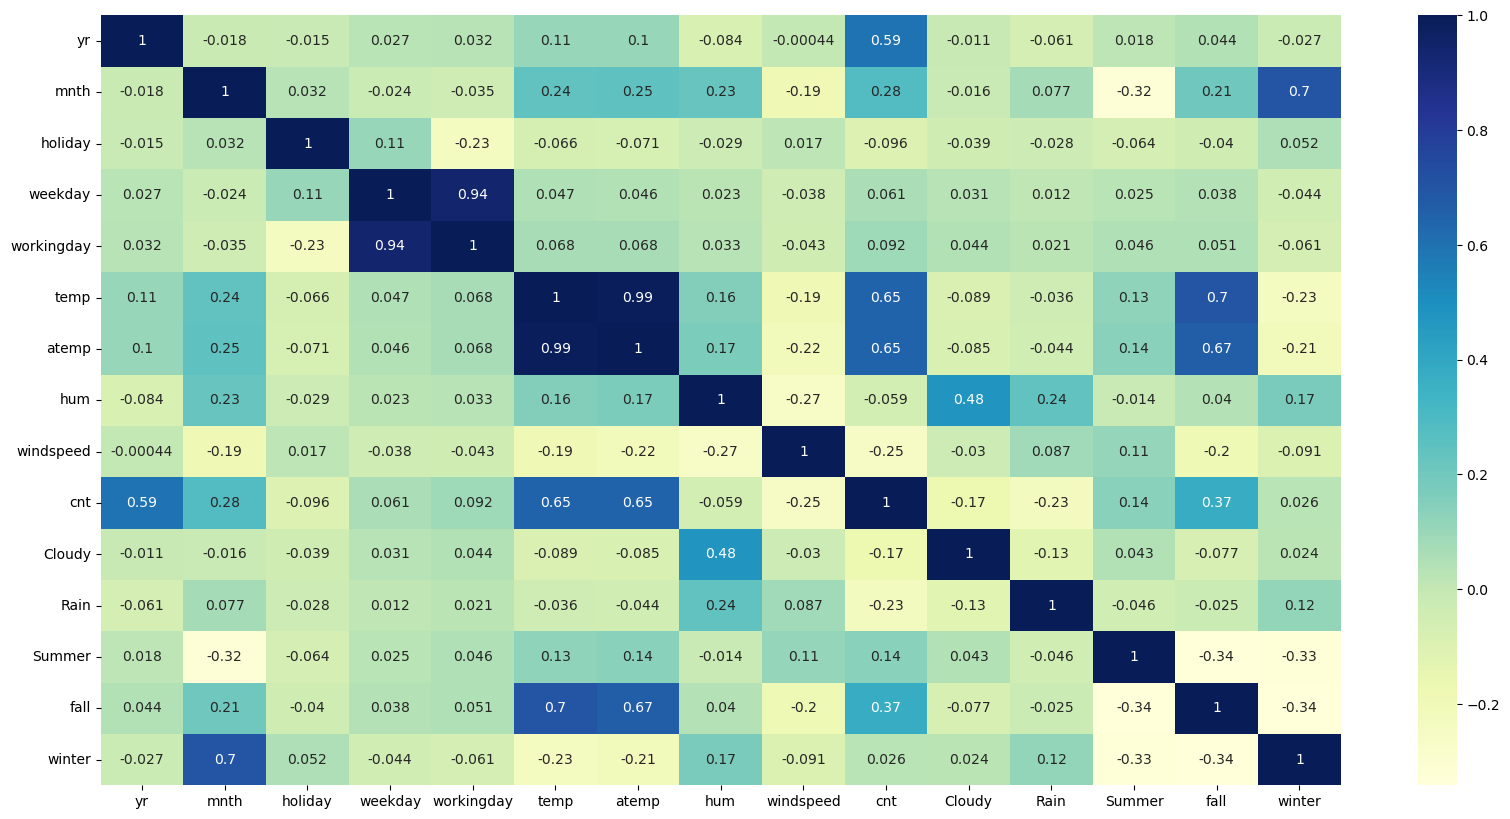

In [471]:
#Before training the model ,checking the correlation after scaling
plt.figure(figsize=(20,10))
sns.heatmap(bike_train.corr(), annot=True, cmap="YlGnBu")
plt.show()
#check which variables are highly correlated

#Training the model

In [473]:

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



In [474]:
bike_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Cloudy,Rain,Summer,fall,winter
576,1,0.545455,0,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0
426,1,0.181818,0,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0
728,1,1.000000,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0
482,1,0.272727,0,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,1,0,0
111,0,0.272727,0,1,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,1,0,0


In [504]:
#X_train,y_train
y_train = bike_train.pop('cnt')
X_train = bike_train


In [397]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,Cloudy,Rain,Summer,fall,winter
576,1,0.545455,0,1,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,0
426,1,0.181818,0,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0
728,1,1.000000,0,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,0,0
482,1,0.272727,0,0,0,0.395666,0.391735,0.504508,0.188475,1,0,1,0,0
111,0,0.272727,0,1,1,0.345824,0.318819,0.751824,0.380981,1,0,1,0,0


#RFE

In [175]:
# Running RFE with the output number of the variable equal to 11
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=11) 
rfe = rfe.fit(X_train, y_train)

In [177]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 2),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Cloudy', True, 1),
 ('Rain', True, 1),
 ('Summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1)]

In [179]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'Cloudy', 'Rain',
       'Summer', 'fall', 'winter'],
      dtype='object')

In [185]:
X_train.columns[~rfe.support_]
# 'mnth', 'weekday', 'workingday' are the columns to eliminate

Index(['mnth', 'weekday', 'workingday'], dtype='object')

In [187]:
X_train_rfe = sm.add_constant(X_train[col])
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.1
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          1.27e-181
Time:                        13:35:26   Log-Likelihood:                 486.01
No. Observations:                 510   AIC:                            -948.0
Df Residuals:                     498   BIC:                            -897.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2180      0.028      7.770      0.0

In [189]:

#We can drop column atemp first as teh p>0.05 which is 0.817
X_train_new = X_train_rfe.drop(['atemp'], axis=1)


In [191]:
#Rebuilding model without atemp
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          8.27e-183
Time:                        14:05:37   Log-Likelihood:                 485.99
No. Observations:                 510   AIC:                            -950.0
Df Residuals:                     499   BIC:                            -903.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2183      0.028      7.804      0.0

In [99]:
X_train_new.head()

,const,yr,holiday,temp,hum,windspeed,clear_weather,Rain/Snow,Summer,fall,winter
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,1,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,1,0,0


In [193]:

X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'Cloudy', 'Rain',
       'Summer', 'fall', 'winter'],
      dtype='object')

In [ ]:
#Dropping the constant column 

In [195]:
X_train_new = X_train_new.drop(['const'], axis=1)

#VIF Method

In [197]:

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,22.68
3,hum,15.00
8,fall,6.48
4,windspeed,3.63
7,Summer,3.38
9,winter,2.47
5,Cloudy,2.13
0,yr,2.03
6,Rain,1.17
1,holiday,1.04


Dropping the hum column and training the model again as vif>5

In [199]:
x = X_train_new.drop(['hum'], axis=1)

In [201]:
X_train_sm = sm.add_constant(x)
lr= sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()
# the model is 82.2% is correlated with rental count

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.1
Date:                Thu, 26 Dec 2024   Prob (F-statistic):          2.84e-181
Time:                        14:13:54   Log-Likelihood:                 479.48
No. Observations:                 510   AIC:                            -939.0
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1395      0.018      7.953      0.000       0.105       0.174
yr             0.2341      0.009     27.423      0.000       0.217       0.251
holiday       -0.0872      0.027     -3.231      0.001      -0.140      -0.034
temp           0.4662      0.034     13.698      0.000       0.399       0.533
windspeed     -0.1546      0.026     -5.942      0.000      -0.206      -0.103
Cloudy        -0.0750      0.009     -8.291      0.000      -0.093      -0.057
Rain          -0.2785      0.026    -10.873      0.000      -0.329      -0.228
Summer         0.1209      0.016      7.743      0.000       0.090       0.152
fall           0.0827      0.021      3.959      0.000       0.042       0.124
winter         0.1572      0.013     11.813      0.000       0.131       0.183
==============================================================================
Omnibus:                       62.352   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.141
Skew:                          -0.634   Prob(JB):                     5.57e-34
Kurtosis:                       5.366   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
vif = pd.DataFrame()
vif['Features']= x.columns
vif['VIF']= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending=False)
vif

# We have good features like summer,year,cloudy,rain etc as good predictions which are having vif <5

,Features,VIF
2,temp,14.13
7,fall,6.14
6,Summer,3.34
3,windspeed,3.26
8,winter,2.38
0,yr,2.02
4,Cloudy,1.47
5,Rain,1.08
1,holiday,1.03


#Residual Analysis of trained data

In [205]:
y_train_cnt = lm.predict(X_train_lm)

C:\Users\hari\AppData\Local\Temp\ipykernel_21060\1886740230.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

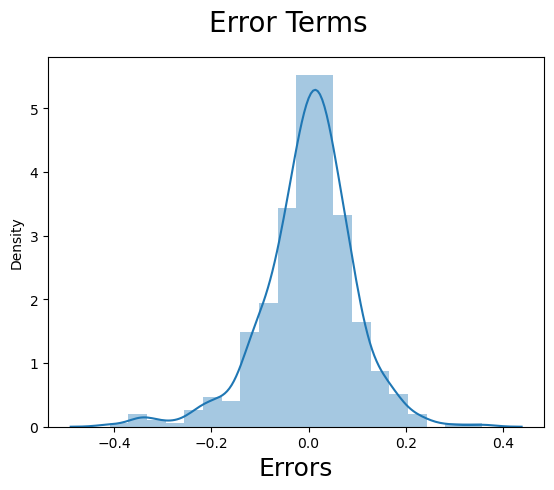

In [115]:
# Importing the required libraries for plots.
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

Above graph is normalised with Mean errors around zero

MAKING PREDICTIONS 

In [207]:
num_vars= ['mnth','temp','atemp','hum','windspeed','cnt']
bike_test[num_vars]= scaler.transform(bike_test[num_vars]) #in test we shouldnt usefit_transform but we can simply transform
bike_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Cloudy,Rain,Summer,fall,winter
184,0,0.545455,1,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,0,1,0
535,1,0.454545,0,1,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,1,0,0
299,0,0.818182,0,1,1,0.511964,0.496145,0.837699,0.334206,0.303382,1,0,0,0,1
221,0,0.636364,0,1,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0
152,0,0.454545,0,1,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,1,0,0


In [209]:
#Dividing into X_test  and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test

In [211]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [213]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

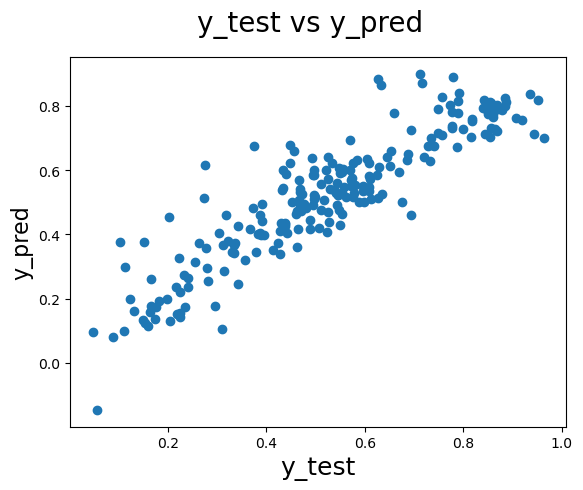

In [215]:
#Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Insights of the model:

Rental count = 0.2341*yr - 0.0872 * Holiday + 0.4662*temp - 0.1546*windspeed - 0.0750*cloudy -0.2785*Rain + 0.1209*Summer + 0.0827*fall + 0.1572*winter

The linear regression model exhibits a strong correlation with the rental count,achieving an R-squared value of 0.822. 
This indicates that approximately 82.2% of the variance in the rental count can be explained by the independent variables included in the model. 
Further analysis using VIF (Variance Inflation Factor) identified 'hum' (humidity) as having multicollinearity and was removed. Residual analysis supported the model's overall validity.
Key predictors:
All the positive coefficients like temp,season_Summer,season_winter indicate that an increase in these values will lead to an increase in the value of cnt.
All the negative coefficient like windspeed, cloudy,rain, Holidays indicate that an increase in these values will lead to a decrease in the value of cn
Hence, it can be clearly concluded that the variables temperature , season/ weather situation are significant in predicting the demand for shared bikes t